MODULE 5 | LESSON 2

# **News Data**

|  |  |
|:---|:---|
| **Reading Time**  |  45 minutes  |
| **Prior Knowledge**  |  Familiarity with Python programming: Basic Python syntax, data manipulation, DataFrames, yfinance, sklearn; <br>Fundamental financial concepts: stocks, market sentiment, risk management, and trading strategies, sentiment analysis  |
| **Keywords**  | Non-negative Matrix Factorization (NMF), Feature Extraction, Parts-based Representation, Sentiment Analysis, <br>Natural Language Processing (NLP), Sentiment Analysis, Topic Modeling, FinBERT, NMF, TF-IDF |

---

*In this lesson, we demonstrate how to use news data and natural language processing (NLP) techniques for financial analysis, specifically for Microsoft. We will explore different news sources, perform sentiment analysis using FinBERT, and use topic modeling (NMF) to uncover hidden themes in the news. The goal is to gain insights that could potentially lead to better-informed financial decisions.*

In [ ]:
# Loading libraries

import datetime
import feedparser
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import yfinance as yf

from datetime import datetime, timedelta
from scipy.special import softmax
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Prompt the user for the API key
api_key = input("Enter your News API key: ")

# **1. Purpose of News Data**

Exploring news data is crucial for informed financial and investment decision-making. Timely and accurate news analysis empowers investors to navigate complex markets effectively. In the dynamic world of finance, where markets fluctuate based on a multitude of factors, news data plays a pivotal role. Here are several reasons why exploring news data is crucial for informed financial and investment decisions:

**Market Sentiment Analysis:**

 - **Emotional Drivers:** News articles capture investor emotions, expectations, and reactions. Positive news can boost confidence, leading to increased investments, while negative news may trigger caution or even sell-offs.
 - **Behavioral Insights:** Understanding market sentiment helps investors anticipate trends and align their strategies accordingly.

**Event Impact Assessment:**
 - **News-Driven Volatility:** Events such as earnings reports, geopolitical developments, or regulatory changes significantly impact stock prices. Analyzing news allows us to assess the potential effects of these events on specific assets or entire sectors.
 - **Timeliness Matters:** Investors who react swiftly to breaking news gain a competitive edge.

**Risk Management:**
 - **Early Warnings:** News provides early warnings about risks. Staying informed helps to mitigate risks, whether it’s a sudden economic downturn, a corporate scandal, or a regulatory shift.
 - **Portfolio Adjustments:** By monitoring news, investors can adjust their portfolios proactively, minimizing exposure to adverse events.

**Sector Insights:**
 - **Industry Trends:** News highlights emerging trends, mergers, acquisitions, and disruptions within specific sectors. Investors can allocate funds based on sector-specific news.
 - **Sector Rotation:** Understanding which sectors are gaining momentum or facing challenges informs strategic asset allocation.

**Algorithmic Trading:**
 - **News-Driven Algorithms:** Algorithmic trading models rely on real-time news feeds. These algorithms react swiftly to breaking news, executing trades based on predefined rules.
 - **Quantitative Strategies:** Incorporating news sentiment scores into quantitative models enhances their predictive power.

**Behavioral Finance:**
 - **Herding Behavior:** News influences investor behavior. Herding (following the crowd) or panic selling during market downturns can be better understood through news analysis.
 - **Fear of Missing Out (FOMO):** News-driven biases impact decision-making. Recognizing these biases helps investors make more rational choices.

In summary, news data isn’t just information; it’s a compass guiding financial decisions. By analyzing news comprehensively, investors gain insights, manage risks, and adapt to the ever-evolving landscape of global markets.

#**2. Sources of News Data**

There's no single news data API that's universally used by all financial engineers. The choice of API often depends on specific needs, budget, and the type of analysis being performed. However, here are some popular and reputable news data APIs commonly used in the financial industry:

1. **Refinitiv (formerly Thomson Reuters)**:
 - Widely used by institutional investors and professional traders.
 - Offers comprehensive news coverage: Global markets, equities, fixed income, commodities, FX, etc.
 - Advanced features: Sentiment analysis, entity recognition, real-time alerts.
 - Integration with Refinitiv Eikon platform: Provides access to a vast range of financial data and analytics tools.

2. **Bloomberg**:
 - Another industry-standard for financial professionals.
 - Extensive news coverage: Global markets, business news, economic data, company information, worldwide televised broadcasts
 - Powerful analytics and data visualization tools.
Integrated with Bloomberg Terminal: Provides a comprehensive suite of financial data and tools.

3. **FactSet**:
 - Popular among investment professionals and asset managers.
 - Strong focus on fundamental data and company research.
 - Offers news coverage: Market news, company announcements, economic data.
 - Integrated with FactSet workstation: Provides access to a wide range of financial data and analytics.

4. **Dow Jones (Factiva)**:
 - Well-known for its business and financial news coverage.
 - Extensive historical archive: Access to news articles dating back decades.
 - Global coverage: News from various regions and languages.
 - Often used for sentiment analysis and text mining.

When choosing an API, the most important considerations are:
 - **Cost:** These APIs typically involve subscription fees, which can vary significantly based on data access, features, and usage volume.
 - **Data Coverage:** Each API has its strengths in terms of the types of news and markets it covers. Choose one that aligns with your specific needs.
 - **Integration:** Consider how easily the API integrates with your existing tools and workflows.

Unfortunately, the APIs used by financial engineers listed above (Refinitiv, Bloomberg, FactSet, Dow Jones) are typically not free to use. They are commercial products targeted toward professional investors and institutions, and they usually involve subscription fees that can be quite substantial. However, there are a few other alternative options available for free or limited free access to get news data, some of which we will consider in detail in this lesson.

**Important Note:** When using free options, be mindful of usage limits and terms of service to avoid exceeding quotas or violating any restrictions.

If you have specific budget constraints or are just starting to explore news data analysis, the free options can be a good starting point. However, for professional-grade financial analysis, investing in a commercial API will likely be necessary to access the depth and breadth of data required.








## **2.1 Using `yfinance` for News Data**

While `yfinance` is primarily known for historical stock price data, it also provides access to financial news related to specific stocks.

For example, we can use the `yfinance` library to get stock information for Microsoft. We can leverage the fact that it's typically a list of dictionaries. Each dictionary represents a news article and contains keys like `title`, `publisher`, `link`, `published`, etc.

Once we have all the interesting details, we can print the news data, and we can also create a DataFrame from specific pieces of information to keep our data for further manipulations and exploratory data analysis.

In [3]:
# Create a Ticker object for Microsoft and access the news data
msft = yf.Ticker("MSFT")
news_data = msft.news

# Print the desired information for each article
for article in news_data:
    content = article.get('content')
    if content:
        # Assuming title, publisher, link are now within 'content'
        print("Published Time:", content.get('pubDate'))
        print("Title:", content.get('title'))  
        print("Publisher:", content.get('provider').get('displayName'))  
        print("Link:", content.get('canonicalUrl').get('url'))
        print("Content Type:", content.get('contentType'))
        print("-" * 30)

Published Time: 2025-04-15T17:39:43Z
Title: Trump promises 'expedited' process for Nvidia's US supercomputer plans as Big Tech pledges top $1.6 trillion
Publisher: Yahoo Finance
Link: https://finance.yahoo.com/news/trump-promises-expedited-process-for-nvidias-us-supercomputer-plans-as-big-tech-pledges-top-16-trillion-173943856.html
Content Type: STORY
------------------------------
Published Time: 2025-04-15T10:00:42Z
Title: The trade war uncovers new economies of scale: Morning Brief
Publisher: Yahoo Finance
Link: https://finance.yahoo.com/news/the-trade-war-uncovers-new-economies-of-scale-morning-brief-100042287.html
Content Type: STORY
------------------------------
Published Time: 2025-04-16T08:37:00Z
Title: 2 Growth Stocks Down 27% or More to Buy Right Now
Publisher: Motley Fool
Link: https://www.fool.com/investing/2025/04/16/2-growth-stocks-down-27-or-more-to-buy-right-now/?source=eptyholnk0000202&utm_source=yahoo-host-full&utm_medium=feed&utm_campaign=article&referring_guid=8b4e

As you notice, here we only have 8 articles. `yfinance` does have some limitations when it comes to retrieving news articles.

 - **Limited Number of Articles:** `yfinance` doesn't provide a direct way to control the number of news articles it fetches. The number of articles returned can vary and seems to be capped, often resulting in a smaller dataset than you might expect. The exact limit is not explicitly documented and might depend on factors like the stock ticker, news availability, and the underlying data source used by `yfinance`.

 - **Reliance on External APIs:** `yfinance` doesn't have its own dedicated news database. It relies on aggregating news from various external sources and APIs. This means the availability and quantity of news data can be influenced by the limitations and potential changes in those external sources.

 - **No Fine-grained Control:** `yfinance` doesn't offer options to filter news articles by specific criteria like date range, news provider, or keywords. You get a general set of recent news articles related to the stock ticker, but you can't customize the query further.


In summary: While `yfinance` is a convenient tool for getting basic stock information and a quick overview of recent news, it's not ideal for comprehensive news analysis or if you need a large and customizable news dataset. But despite limitations, `yfinance` still has variable use cases, especially when you need quick and easy access to financial data.

 - **Simple News Monitoring:** Getting a snapshot of recent news related to a stock. While limited, the news feature in `yfinance` can be helpful for staying updated on major developments or headlines affecting a company.

 - **Prototyping or educational purposes:** It's a great tool for learning about financial data analysis or for quickly testing ideas without the overhead of more complex data sources.



## **2.2 RSS Feeds: Google News RSS**

An alternative way of getting news updates is to subscribe to an RSS feed. RSS stands for Really Simple Syndication or Rich Site Summary. It's a standardized web feed format that allows users to subscribe to updates from websites or blogs. These updates are typically delivered as news headlines, article summaries, or other content changes. Many well-known financial news sources provide RSS feeds. Some examples include the *Wall Street Journal*, Bloomberg, Reuters, *Financial Times*, Seeking Alpha, The Motley Fool, Benzinga, etc.

In this lesson, we explore using Google News RSS to access news articles from Google News in a structured format that can be easily processed by machines. While not strictly an API, we can parse Google News RSS feeds for free using libraries like `feedparser` Python library designed to parse syndicated feeds, most commonly RSS and Atom feeds. It can handle various feed formats and variations, making it a versatile tool for extracting information from different sources.

In the following code, we define the RSS feed URL and extract article information (title, link, publication date, etc.) for the query term "Microsoft":

In [4]:
# Define RSS feed URL and retrieve feed
query = "Microsoft"
rss_url = f"https://news.google.com/rss/search?q={query}t&hl=en-US&gl=US&ceid=US:en"
feed = feedparser.parse(rss_url)

for entry in feed.entries:
    print("Published:", entry.published)
    print("Title:", entry.title)
    print("Link:", entry.link)
    print("-" * 30)

Published: Tue, 15 Apr 2025 23:00:16 GMT
Title: Text extractor in Snipping Tool begins rolling out to Windows Insiders - Windows Blog
Link: https://news.google.com/rss/articles/CBMiwgFBVV95cUxPSE0td3I2RmZtLTUtdzIyOGdpZlRiZndJR2RXcjhZVF9fbmJGX2dpalhSUFNsaGM1b2FxQ2NMWWlFbDRrODdyY0NrNTYyblFpaWFUVnRNMFNISGtFOGxnVjFObzlQOVpPNmM5aVhHelpZdEJUOXlfTi1ZY1JLbG40VFI3a0FDNWN3ZlNpTEg1OEdYbE42X2ItX3JmQzJiRDdFWkJQOF9tU2hLUnlWZHg5dkFkQ1ZlOU40Z05wVjJMeDVqQQ?oc=5
------------------------------
Published: Tue, 15 Apr 2025 20:32:26 GMT
Title: Announcing new computer use in Microsoft Copilot Studio for UI automation - Microsoft
Link: https://news.google.com/rss/articles/CBMizgFBVV95cUxOU3R0QVhraXdJakhKUFczZkN6SE5kWVVCdER3OVhYRHZDMXVCNDU2dWJzOHdpcW9zcW9YbkhROHhINXFUYTg4c3pvOTRCOXl4LU5NeUNTVnMwMTF0X0dwOUpaYldCSFRjbm5vanVhSjAyWC1xRERNb3ZRNmdWTF9RVjFlRDlELUZKZUc5bkZKWXNDNEVEdVpvQUVmME1TbHlhNHhVbHpNeDJ1cTIta1BROEZ1Sy1EQ21EY2pic1dVVDREcy1leUw5bEFVYzhVQQ?oc=5
------------------------------
Published: Tue, 15 Apr 2

As you can see here, we have more news titles than we get from `yfinance`. But again, Google News RSS also has its advantages and limitations:

**Advantages of Google News RSS:**
 - Free Access: You can access and parse Google News RSS feeds without any API keys or subscription fees.
 - Wide Range of Topics: Google News covers a vast array of news categories and topics.
 - Fresh Content: RSS feeds are updated frequently, so you get access to the latest news articles.

**Limitations:**
 - No Fine-grained Control: You can't filter articles by specific criteria like date range or news source within the RSS feed itself.
 - Potential Rate Limiting: Google might impose rate limits on how frequently you can access their RSS feeds.
 - No Historical Data: RSS feeds typically provide only recent articles, not a historical archive.

**Use Cases:**
 - Staying Updated on Specific Topics: Subscribe to RSS feeds for topics relevant to your interests or investments.
 - Building Simple News Aggregators: Create a basic news aggregator that displays articles from various Google News RSS feeds.
 - Sentiment Analysis and Text Mining: Extract text from news articles for sentiment analysis or other text-based research.

Overall, Google News RSS is a valuable resource for accessing free news data, especially for smaller projects, personal use, or when you need a quick overview of recent news on specific topics.

## **2.3 News API**

Although not a Python package, News API provides a straightforward way to fetch news data. It offers a free tier with limited requests per day. This might be sufficient for small-scale projects or learning purposes. You will need to sign up for a free API key on the NewsAPI website before using it.

News API is a cloud-based REST API that provides programmatic access to a vast collection of news articles from thousands of sources around the world.
It aggregates news from reputable publishers, news agencies, blogs, and other online media outlets.

**Compared to `yfinance` and Google News RSS:**
 - More Articles: You can potentially retrieve a much larger number of news articles with News API.
 - Customization: You have much finer control over the news data you fetch through search and filtering options.
 - Additional Features: Sentiment analysis and various API endpoints add more analytical capabilities.

**Limitations:**
 - Cost: While it offers a free tier with limited requests, you'll need a paid subscription for larger-scale usage or access to all features.
 - Rate Limits: Even with paid plans, there are rate limits on how many requests you can make within a given time period.

**Use Cases:**
 - News Monitoring and Analysis: Track news trends, identify emerging topics, and analyze media coverage for specific companies, industries, or events.
 - Sentiment Analysis: Gauge public sentiment toward brands, products, or political figures.
 - Market Research: Gather insights on consumer behavior, competitor activity, and industry trends.
 - Content Curation: Build news aggregators or personalized news feeds.
 - Algorithmic Trading: Incorporate news sentiment and events into trading strategies.

Overall, News API is a more powerful and versatile tool for news data analysis compared to `yfinance` and Google News RSS. It's a great option if you need a larger dataset, more customization, and additional features like sentiment analysis. However, it does come with a cost for more extensive usage.

For the remainder of this lesson, we will explore some of the News API features. First, we need to sign up and get an API key.

 - Sign Up: Create a free account on the News API website: https://newsapi.org/pricing, selecting the free Developer pricing plan. Sign up as an individual. The free tier offers limited requests per day and allows you to search news articles (with a 24-hour delay) up to a month old, but this should suffice for learning purposes.
 - Get Your API Key: As soon as you sign up, you'll be greeted with your unique API key that you'll need to include in your requests.
 - On the greeting page, you will also find a link to the "Getting Started Guide." Please take some time to explore the API documentation for detailed information on endpoints, parameters, and response formats.

In this lesson, we will explore some basic functionality and experiment with different queries and filters to tailor the results to our specific needs.

The following is the example code that fetches news articles related to "Microsoft" from News API, saves them in DataFrame, and handles potential errors during the process. Do not forget to get your own API key. Then, please navigate to the top of this lesson and replace `API_KEY` with your actual API key in the code cell at the top of this notebook. Please rerun that code cell and then proceed with the following code cell below:

In [5]:
# Define News API variables
query = "Microsoft"
url = f"https://newsapi.org/v2/everything?q={query}&apiKey={api_key}&language=en"
response = requests.get(url)

# Get news data
results = []
if response.status_code == 200:
    news_data = response.json()
    for article in news_data['articles']:
        results.append({
            'Date': article['publishedAt'][:10],  # Extract date
            'URL': article['url'],
            'Source': article['source']['name'],
            'Author': article['author'],
            'Title': article['title'],
            'Description': article['description'],
            'Content': article['content']
        })
else:
    print("Error fetching news:", response.status_code)

# Create DataFrame
df = pd.DataFrame(results)
df


,Date,URL,Source,Author,Title,Description,Content
0,2025-04-04,https://www.theverge.com/news/643336/microsoft...,The Verge,Tom Warren,Microsoft turns 50,"Microsoft was originally founded on April 4th,...","Microsoft was originally founded on April 4th,..."
1,2025-03-26,https://www.theverge.com/news/636622/microsoft...,The Verge,Tom Warren,Microsoft’s account sign-in UI gets a new desi...,Microsoft is rolling out a new sign-in screen ...,The new authentication experience is part of M...
2,2025-04-09,https://www.theverge.com/news/645891/these-mig...,The Verge,Tom Warren,These might be Microsoft’s new Office icons,Microsoft appears to be working on new 3D icon...,Microsoft has reportedly revealed some new 3D ...
3,2025-04-04,https://www.theverge.com/news/643564/microsoft...,The Verge,Umar Shakir,All of the news from Microsoft’s 50th Annivers...,Microsoft is holding a 50th Anniversary Copilo...,"LIVEUpdated Today, Apr 4, 2025, 4:17 PM UTC\r\..."
4,2025-04-04,https://www.theverge.com/news/643251/microsoft...,The Verge,Tom Warren,Microsoft is now 50 years old,"Fifty years ago today, Micro-Soft was founded ...",Microsofts software empire started all the way...
...,...,...,...,...,...,...,...
85,2025-04-08,https://www.polygon.com/news/554879/bds-palest...,Polygon,Ian Walker,Palestinian-led BDS movement adds Microsoft’s ...,"BDS, a pro-Palestinian human rights movement f...","BDS, a pro-Palestinian human rights movement f..."
86,2025-04-03,https://hackaday.com/2025/04/03/a-very-trippy-...,Hackaday,Tom Nardi,A Very Trippy Look at Microsoft’s Beginnings,It’s not often you’ll see us singing the prais...,It’s not often you’ll see us singing the prais...
87,2025-04-10,https://hackaday.com/2025/04/10/windows-on-arm...,Hackaday,Bryan Cockfield,Windows on ARM on Arm,While some companies like Apple have gone all-...,While some companies like Apple have gone all-...
88,2025-03-17,https://gizmodo.com/googles-new-ai-model-can-r...,Gizmodo.com,Thomas Maxwell,Google’s New AI Model Can Remove Watermarks Fr...,"Gemini 2.0 Flash's image model is very good, t...",Google’s new Gemini Flash 2.0 image generation...


We can also save the dataset locally in a news_data.csv file. Saving News API data to a CSV file is beneficial because of the limitations on data availability for certain time periods, particularly with the free plan. It is highly probable that the remainder code in this lesson will output different results when you run it. Thus, referring to news_data.csv might be beneficial.

In [6]:
# Save News dataset
df.to_csv('news_data.csv', index=False)

`if response.status_code == 200:` This line checks if the value of `response.status_code` is equal to 200. In the context of HTTP requests, a status code of 200 typically indicates a successful request.

If the condition in the if statement is true (i.e., the status code is 200), this line executes and the code execution will move to next line. `response.json()` in the following line is a method that attempts to parse the response content as JSON (JavaScript Object Notation). JSON is a common data format used for data exchange on the web. The parsed JSON data is then assigned to the variable `news_data`.

The code output saves article metadata for each news item: information like publication date (publishedAt), source (source), author (author), title (title), description (description), content (content), and URL (url) provide context for the sentiment analysis.

Note the "[Removed]" in the Content column of dataframe. This is likely due to content restrictions imposed by the news source or by News API itself. The reasoning behind this is as follows:

 - Publisher Restrictions: Some news publishers may choose to limit the distribution of their full article content through APIs. They may only provide headlines, summaries, or partial content. In such cases, News API might replace the unavailable content with "[Removed]".
 - News API Policies: News API itself might have policies in place to prevent the scraping or redistribution of full articles. They may intentionally remove or truncate content to comply with copyright regulations or publisher agreements.
 - Content Filtering: In some cases, News API might apply content filtering to remove sensitive or inappropriate content. This could also result in "[Removed]" appearing in place of the filtered content.

Unfortunately, there's no direct way to retrieve the removed content through News API. We would need to access the full article through the original source's website if it is available.

The News API allows you to **filter news articles by category**. We can specify the category parameter in an API request to retrieve news from a specific category, such as business, entertainment, general, health, science, sports, and technology.

Important considerations:
 - Category Availability: The availability of certain categories might vary depending on News API plan and the geographic region we are targeting.
 - Relevance: While the business category is a good starting point for finance news, it might also include articles that are not strictly finance-related. We might need to further filter the results based on keywords or other criteria to refine the selection.
 - Language and Country: We can further refine search by specifying the language and country parameters to retrieve news from a specific region and in a particular language.

Unfortunately, the News API does not directly support searching for multiple categories simultaneously using the category parameter. We can only specify one category at a time. However, we can achieve a similar result by making separate API requests for each category and then combining the results.

A significant limitation of searching by category is that NEWS API currently does not support category parameter on `https://newsapi.org/v2/everything` endpoint. Instead, we should use `https://newsapi.org/v2/top-headlines` endpoint. This endpoint allows filtering by category. However, this endpoint has some limitations compared to `/everything`:
 - Limited Articles: It returns a limited number of articles (usually the top 20-30 headlines) for a given query and category. It's not meant for comprehensive news retrieval.
 - Focus on Recent News: It primarily focuses on recent news and might not include older articles.
 - Source Restrictions: It sources articles only from a limited set of popular and well-known news sources, potentially missing out on smaller publications.



# **3. Sentiment Analysis**

Financial traders can leverage news data and sentiment analysis in several ways to enhance their decision-making processes. News data and sentiment analysis empower traders to make informed decisions, manage risks, and adapt to market dynamics. By combining quantitative models with qualitative insights, traders gain a competitive edge.

**How Financial Traders Might Use Sentiment Analysis:**
 - Identify Market Sentiment: Analyze the overall sentiment of news articles related to a specific stock, sector, or the entire market to gauge investor sentiment and predict potential price movements.
 - Event-Driven Trading: Detect news events (like earnings announcements, product launches, regulatory changes) and analyze their sentiment to identify trading opportunities.
 - News-Based Sentiment Indicators: Create custom indicators based on news sentiment to supplement technical analysis and inform trading decisions.
 - Risk Management: Monitor news sentiment to assess potential risks and adjust portfolio positions accordingly.

**Important Considerations:**
 - Accuracy of Sentiment Analysis: Sentiment analysis is not always perfect, especially for financial news, which can contain complex language and jargon. It's crucial to validate the accuracy of your sentiment analysis models.
 - Timeliness: News sentiment can change rapidly. For trading purposes, real-time or near-real-time news feeds and sentiment analysis are often required.
 - Integration with Trading Systems: You'll need to integrate the news sentiment data with your trading platform or algorithms to automate trading decisions based on the analysis.

Remember that sentiment analysis is just one tool in a financial trader's toolkit. It should be used in conjunction with other forms of analysis and risk management strategies.



## **3.1 Sentiment analysis using FinBERT**

Unfortunately, for us, News API's Sentiment Analysis is a paid feature. If you have access to such a plan, the API response would already include sentiment scores (positive, negative, neutral) for each article. You can then use these scores directly in your trading strategies.

In this lesson, we will use an alternative method by implementing the sensitive scoring function manually. For this, we will use **FinBERT**, a pre-trained NLP model specifically designed for financial text. It's based on the BERT architecture (Bidirectional Encoder Representations from Transformers), a type of Transformer model, and has been fine-tuned on a large corpus of financial data.

**Transformers** are a type of deep learning model that have been very successful in natural language processing (NLP) tasks. They are particularly good at understanding the relationships between different words in a sentence, which is important for tasks like sentiment analysis. FinBERT is a specific type of Transformer model that has been pre-trained on a large corpus of financial text. This means that it has already learned a lot about the language used in financial documents. This makes it particularly good at understanding the nuances of financial language, including jargon, sentiment, and specific financial concepts, and this makes it well suited for tasks like sentiment analysis of financial news articles.

In the following piece of code, we utilize the FinBERT model to apply a sentiment score to each news article. To do this, we first need to preprocess the content of each article using the `preprocess` function. Then, we apply `get_sentiment()` to perform sentiment analysis on a given preprocessed text using the FinBERT model. Here's how it works:

 - **Tokenization:** The preprocessed text is tokenized using the tokenizer object. Tokenization is the process of breaking down the text into individual units (tokens) - words or subwords - that the model can understand. The `return_tensors='pt' ` argument specifies that the tokens should be returned as PyTorch tensors. PyTorch tensors are multi-dimensional arrays that are a fundamental data structure in the PyTorch library. They are similar to NumPy arrays but with some key advantages. As an analogy, think of PyTorch tensors as containers that hold numerical data that can be of various dimensions (e.g., 1D for vectors, 2D for matrices, 3D or higher for more complex data).
 - **Model Inference and Score Extraction using Softmax:** The tokenized input is passed to the FinBERT model for inference. The relevant scores are extracted from the model's output and converted to a NumPy array using `detach().numpy()`. The scores are then passed through the `softmax` function. Softmax converts the scores into probabilities, ensuring that they sum up to 1.

The `get_sentiment()` function returns a dictionary containing the probabilities for negative, neutral, and positive sentiment, with the highest probability first.

The following code snippet processes the response from the News API and performs sentiment analysis (by successive implementation of text preprocessing, tokenization, model inference, and getting a sentiment) on the 'Description' of each retrieved article. We are also dropping rows where 'Description' has been removed and the article is no longer available:


In [7]:
# Specify the FinBERT model
MODEL = f"ProsusAI/finbert"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# Text processing function
def preprocess(text):
    if text is None: # Handle None values by returning an empty string if text is None
        return ""
    new_text = []
    for t in text.split(" "):
        t = '' if t.startswith('#') and len(t) > 1 else t  # remove hashtags
        t = '' if t.startswith('@') and len(t) > 1 else t  # remove usernames
        t = '' if t.startswith('http') else t  # remove URLs
        new_text.append(t)
    return " ".join(new_text)

# Sentiment scoring function
def get_sentiment(text):
    text = preprocess(text)
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return {
        'positive': scores[0],
        'negative': scores[1],
        'neutral': scores[2]
    }

Now that we have initiated the FinBERT model and constructed helper functions, we can apply these techniques onto our `df` News data DataFrame. Please note that by the time you run the code in this lesson, availability of news data via the News API free plan would have changed since the plan allows one month of history. We saved the original News data when we wrote this lesson. You will need to load the 'WQU_FD_news_data.csv' file in order to get the same results in this lesson. Otherwise, please proceed to explore fresh data.

In [9]:
# Open saved DataFrame - OPTIONAL
df = pd.read_csv('WQU_FD_news_data.csv')
df.head()

,Date,URL,Source,Author,Title,Description,Content
0,2024-09-27,https://removed.com,[Removed],NaN,[Removed],[Removed],[Removed]
1,2024-10-09,https://removed.com,[Removed],NaN,[Removed],[Removed],[Removed]
2,2024-10-10,https://www.theverge.com/2024/10/10/24266333/a...,The Verge,Kylie Robison,Agents are the future AI companies promise — a...,"OpenAI, Google, and Microsoft believe autonomo...",Illustration by Cath Virginia / The Verge | Ph...
3,2024-10-01,https://www.theverge.com/2024/10/1/24258337/mi...,The Verge,Tom Warren,Microsoft is using AI to improve Windows search,Microsoft is improving its Windows search acro...,Illustration by Alex Castro / The Verge\r\n\n ...
4,2024-10-01,https://www.wired.com/story/mustafa-suleyman-i...,Wired,Will Knight,Microsoft’s AI Boss Wants to Bring ‘Emotional ...,Microsoft AI CEO Mustafa Suleyman is overseein...,We don't save any of the material with Copilot...


In [10]:
# Remove rows with "[Removed]" or None in Description
df = df[df['Description'] != '[Removed]']
df = df.dropna(subset=['Description'])

# Apply sentiment scoring to the 'description' column and create new columns
df.loc[:, 'Sent_positive'] = df['Description'].apply(lambda x: get_sentiment(x)['positive'])
df.loc[:, 'Sent_negative'] = df['Description'].apply(lambda x: get_sentiment(x)['negative'])
df.loc[:, 'Sent_neutral'] = df['Description'].apply(lambda x: get_sentiment(x)['neutral'])
df


,Date,URL,Source,Author,Title,Description,Content,Sent_positive,Sent_negative,Sent_neutral
2,2024-10-10,https://www.theverge.com/2024/10/10/24266333/a...,The Verge,Kylie Robison,Agents are the future AI companies promise — a...,"OpenAI, Google, and Microsoft believe autonomo...",Illustration by Cath Virginia / The Verge | Ph...,0.582752,0.009541,0.407707
3,2024-10-01,https://www.theverge.com/2024/10/1/24258337/mi...,The Verge,Tom Warren,Microsoft is using AI to improve Windows search,Microsoft is improving its Windows search acro...,Illustration by Alex Castro / The Verge\r\n\n ...,0.771637,0.011051,0.217312
4,2024-10-01,https://www.wired.com/story/mustafa-suleyman-i...,Wired,Will Knight,Microsoft’s AI Boss Wants to Bring ‘Emotional ...,Microsoft AI CEO Mustafa Suleyman is overseein...,We don't save any of the material with Copilot...,0.335344,0.011903,0.652753
5,2024-10-01,https://www.theverge.com/2024/10/1/24259187/mi...,The Verge,Tom Warren,Microsoft gives Copilot a voice and vision in ...,Microsoft is overhauling its Copilot AI assist...,Image: Microsoft\r\n\n \n\n\n Copilot is trans...,0.281657,0.026102,0.692241
6,2024-10-02,https://www.theverge.com/2024/10/2/24260296/mi...,The Verge,Tom Warren,Microsoft wants to know why some game develope...,Microsoft is looking for Xbox feedback from ga...,Image: Microsoft\r\n\n \n\n Microsoft wants to...,0.048003,0.021824,0.930173
...,...,...,...,...,...,...,...,...,...,...
95,2024-10-12,https://gizmodo.com/forget-amazon-prime-day-th...,Gizmodo.com,Gizmodo Deals,"Forget Amazon Prime Day, This Windows 11 Pro L...","Right after Prime Day, StackSocial is offering...","Following the Prime Day event, a deal has emer...",0.080600,0.011433,0.907967
96,2024-10-04,https://www.fastcompany.com/91203365/microsoft...,Fast Company,Associated Press,Microsoft and the DOJ intercept this Russian h...,Russian hacking group Star Blizzard is targeti...,A hacking group tied to Russian intelligence t...,0.022818,0.562415,0.414767
97,2024-09-17,https://www.digitaltrends.com/computing/launch...,Digital Trends,Willow Roberts,Launching Windows 11 apps could get up to 50% ...,has spotted a recent from Microsoft confirming...,Windows Latest has spotted a recent support do...,0.885827,0.008787,0.105386
98,2024-10-09,https://finance.yahoo.com/news/microsoft-corp-...,Yahoo Entertainment,Neha Gupta,Microsoft Corp (MSFT): Stock That Will Make Yo...,We recently compiled a list of the 10 stocks t...,We recently compiled a list of the 10 stocks t...,0.055370,0.013606,0.931024


The code output contains sentiment scores. This is how to interpret sentiment:

 - Higher probability indicates stronger sentiment. For example, if `positive: 0.85`, it suggests a strong positive sentiment expressed in the article.
 - Look for dominant sentiment. The category with the highest probability usually represents the overall sentiment of the article.
 - Consider the context. Even with high sentiment scores, it's important to read the article content to understand the nuances and specific aspects driving the sentiment.

By analyzing the sentiment scores alongside the article content, we can gain insights into the overall sentiment toward Microsoft as reported in the news. This information can be valuable for understanding market perception, identifying potential trends, and making informed decisions.

## **3.2 Visualizing Sentiment Scores**

We can now visualize sentiment scores. But before doing this, note that there are multiple articles on some days. Directly summing up the sentiment scores when there are multiple articles on the same day can lead to inflated values and spikes in the plot. To address this, we should normalize the sentiment scores by the number of articles on each day before plotting. By normalizing the sentiment scores, the plot should now show a more accurate representation of the overall sentiment trend without being affected by the number of articles on each day. The spikes should be reduced, and the plot will be more interpretable.

In the following code snippet we group articles by date and aggregate to get both the sum and count of articles for each date. Then, we divide the sum of each sentiment score by the count of articles for that date to get the average sentiment for the day. This normalizes the scores and prevents inflation due to varying numbers of articles. Then, we use the normalized sentiment scores for visualization.


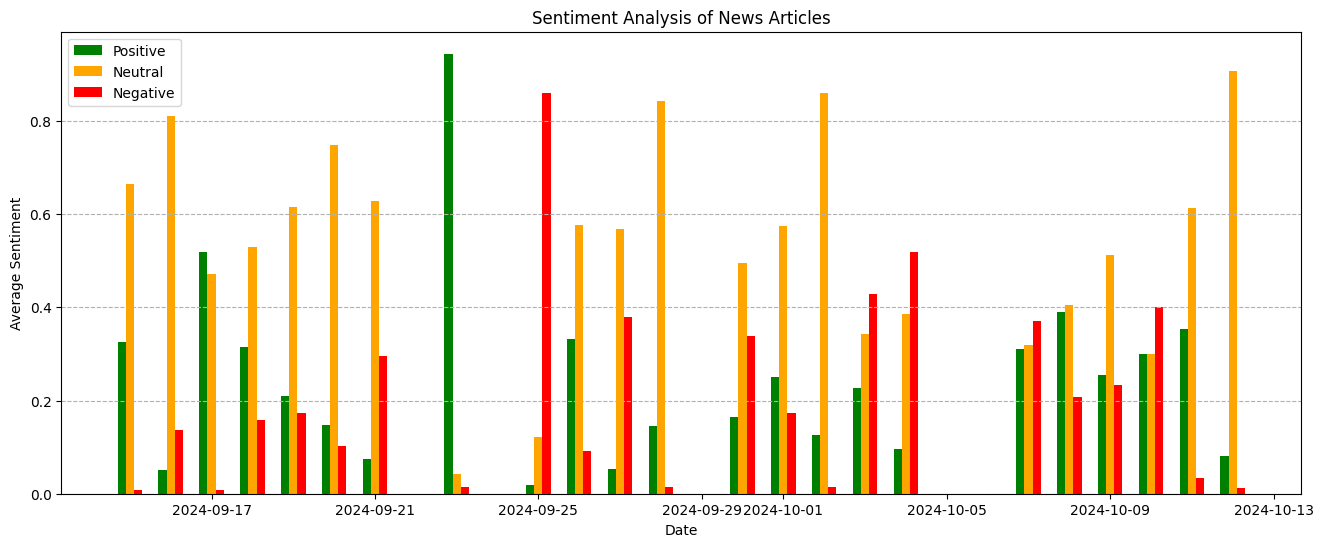

In [11]:
# Group by date and calculate average sentiment scores
df_grouped = df.groupby('Date').agg(['sum', 'count'])  # Get sum and count

# Create new columns for normalized sentiment scores
df_grouped['avg_positive'] = df_grouped['Sent_positive']['sum'] / df_grouped['Sent_positive']['count']  # Normalize positive
df_grouped['avg_negative'] = df_grouped['Sent_negative']['sum'] / df_grouped['Sent_negative']['count']  # Normalize negative
df_grouped['avg_neutral'] = df_grouped['Sent_neutral']['sum'] / df_grouped['Sent_neutral']['count']  # Normalize neutral

# Convert df_grouped.index to DatetimeIndex
df_grouped.index = pd.to_datetime(df_grouped.index)

# Plot the sentiment data
fig, ax = plt.subplots(figsize=(16, 6))
width = 0.2
ax.bar(df_grouped.index - pd.DateOffset(days=width), df_grouped['avg_positive'], width=width, label='Positive', color='green')
ax.bar(df_grouped.index, df_grouped['avg_neutral'], width=width, label='Neutral', color='orange')
ax.bar(df_grouped.index + pd.DateOffset(days=width), df_grouped['avg_negative'], width=width, label='Negative', color='red')

# Set plot attributes (labels, ticks, title, legend, gridlines)
ax.set_xlabel('Date')
ax.set_ylabel('Average Sentiment')
ax.set_title('Sentiment Analysis of News Articles')
ax.legend()
ax.grid(True, axis='y', linestyle='--')
plt.show()


The resulting plot is a bar chart visualizing the average sentiment of news articles over time. There are three bars for each date, representing the three sentiment categories: positive (green), negative (red), and neutral (orange). The height of each bar indicates the magnitude of the average sentiment score for that category on the corresponding date. Taller bars indicate stronger sentiment.

The plot allows us to observe trends in sentiment over time. We can see how the average sentiment changes across dates, whether it's becoming more positive, negative, or staying neutral. By comparing the heights of the bars for each category, we can identify periods of stronger positive or negative sentiment. For example, if on a particular date, the red bar (negative) is much taller than the green bar (positive), it suggests that the news articles for that date were generally more negative in sentiment. Conversely, a taller green bar would indicate more positive sentiment.

## **3.3 Sentiment Analysis Scores in Conjunction with Stock Price**

Let's consider the following example to see how we can use sentiment analysis scores in conjunction with Microsoft's stock price, keeping in mind the caveats about sentiment analysis accuracy and the need for other analysis tools.

In this example, we will visualize sentiment and price trends. We'll plot sentiment scores alongside historical stock prices. This can help to visually identify potential correlations between sentiment shifts and price movements.

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


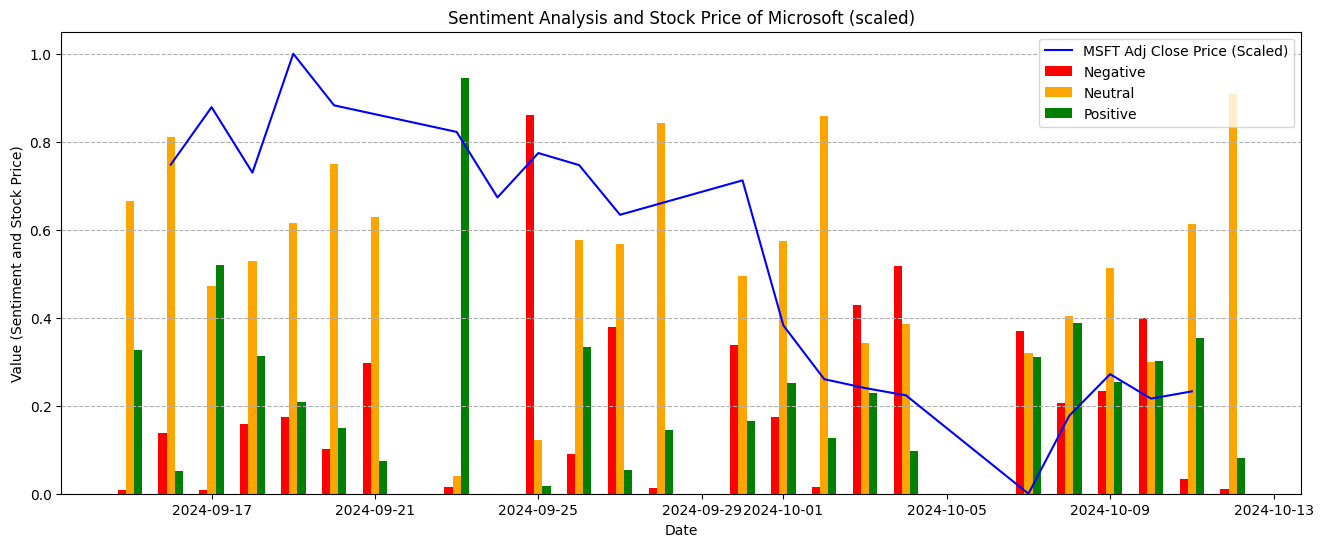

In [12]:
# Fetch Microsoft stock data for the same date range
msft = yf.download("MSFT", start=df_grouped.index.min(), end=df_grouped.index.max())

# Scale the Microsoft price data
scaler = MinMaxScaler()
scaled_stock_price = scaler.fit_transform(msft[['Close']])

# Plot scaled price plot
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(msft.index, scaled_stock_price, color='blue', label='MSFT Adj Close Price (Scaled)')

# Plot the sentiment data
width = 0.2  # Adjust the width as needed
ax.bar(df_grouped.index - pd.DateOffset(days=width), df_grouped['avg_negative'], width=width, label='Negative', color='red')
ax.bar(df_grouped.index, df_grouped['avg_neutral'], width=width, label='Neutral', color='orange')
ax.bar(df_grouped.index + pd.DateOffset(days=width), df_grouped['avg_positive'], width=width, label='Positive', color='green')

# Set plot attributes (labels, ticks, title, legend, gridlines)
ax.set_xlabel('Date')
ax.set_title('Sentiment Analysis and Stock Price of Microsoft (scaled)')
ax.set_ylabel('Value (Sentiment and Stock Price)')
ax.legend()
ax.grid(True, axis='y', linestyle='--')
plt.show()


Now the plot also shows Microsoft's stock price along with sentiment score bars. Please note that the stock price has been scaled, and we did this using MinMaxScaler. The MinMaxScaler from `sklearn.preprocessing` scales data to a specific range, typically between 0 and 1. It does this by applying the following formula:

$$X_{\text{scaled}} = \frac{(X - X_{min})}{(X_{max} - X_{min})}$$

Where:

 - $X$ is the original data;
 - $X_{\text{scaled}}$ is the scaled data;
 - $X_{min}$ is the minimum value of each feature (column) in $X$;
 - $X_{max}$ is the maximum value of each feature (column) in $X$;

This means that the data point with the maximum value in the original data will be scaled to 1. The data point with the minimum value in the original data will be scaled to 0. And all other data points will be scaled proportionally between 0 and 1 based on their relative position within the original data range.

While the scaled stock price doesn't show the actual price values, it still represents the stock price movement in a normalized way, allowing us to focus on the trends and patterns and compare them with other scaled features. When we plot the scaled stock price alongside the sentiment scores, we're essentially comparing the trends and patterns of both features over time. We can observe whether positive sentiment tends to coincide with upward price movements, negative sentiment with downward movements, or if there are any other interesting relationships.

# **4. Scenario: Topic Modeling of Financial News**

We will now use the News API data to discover underlying topics in financial news articles related to Microsoft and analyze sentiment associated with each topic.

**Topic modeling** is an unsupervised machine learning technique used to discover hidden thematic structures or topics within a collection of documents (also known as a **corpus**). It aims to automatically identify groups of words that frequently co-occur in documents, representing underlying themes or subjects. Topic modeling algorithms typically work by assuming that each document is a mixture of a small number of topics, and each topic is characterized by a distribution of words. The goal is to learn these topic distributions and the document-topic assignments.

Key terminology:

 - **Document:** A single unit of text, such as an article, blog post, or tweet.
 - **Corpus:** A collection of documents.
 - **Topic:** A hidden thematic structure or theme within the corpus, represented by a distribution of words.
 - **Document-Topic Distribution:** The probability or weight of each topic within each document.
 - **Topic-Word Distribution:** The probability or weight of each word within each topic.

Non-negative matrix factorization (NMF) is a powerful technique for discovering hidden topics in text data. By applying it to financial news, we can uncover the main themes being discussed about Microsoft. Combining topic modeling with sentiment analysis provides a deeper understanding of the sentiment associated with different topics. This can help identify areas of positive or negative perception toward the company. The insights gained from this analysis can inform investment decisions, risk management, and public relations strategies.

**Implementation steps:**

 - **Data Preparation:** We will use the existing `df` DataFrame containing News API data selecting the 'Description' column as the text data for analysis. We will preprocess the text data (remove stop words, punctuation, stemming/lemmatization).

 - **Document-Term Matrix (TDM) Creation:** Then we will create a document-term matrix using TF-IDF (Term Frequency-Inverse Document Frequency). This matrix represents the frequency or importance of each word in each document.

 - **NMF Application:** We apply NMF to the document-term matrix to decompose it into two matrices: $W$ matrix representing the importance of each topic in each document and $H$ matrix representing the importance of each word in each topic.

 - **Topic Extraction and Interpretation:** Access the topic-word matrix ($H$) in order to examine the top words for each topic. Identify the words with the highest weights in each row of $H$ to understand the theme of each topic. Based on the top words, we give meaningful names to the topics to make them interpretable.

 - **Document-Topic Assignment:** Obtain the document-topic matrix ($W$) in order to assign dominant topics to documents. For each document, we find the topic with the highest weight in the corresponding row of $W$. This assigns the most prominent topic to each document.






## **4.1 Data Preparation**

We start with data preparation. We preprocess the 'Description' column using the `preprocess()` function introduced earlier and save each processed description in a new column named 'Processed_Description':

In [13]:
# Preprocessing 'Description' column in df
df.loc[:, 'Processed_Description'] = df['Description'].apply(lambda x: preprocess(x))


Then, we are ready to apply the Term Frequency-Inverse Document Frequency (TF-IDF) technique.



## **4.2 Feature Extraction - Document-Term Matrix (TDM)**

In the following code snippet, we fit the `TfidfVectorizer` vectorizer to our data in the 'Processed_Description' column. We apply the `TfidfVectorizer` vectorizer with the `max_features=250` parameter that limits the vocabulary size to the 250 most frequent words. This helps reduce the dimensionality of the document-term matrix (DTM) and can improve performance. We also use a `stop_words='english'` parameter that removes common English words (like "the," "a," "is") from the vocabulary, as they often don't carry much meaningful information. This will convert the text data in 'Processed_Description' into a document-term matrix (DTM) represented by the variable `dtm`:


In [14]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=250, stop_words='english')
dtm = vectorizer.fit_transform(df['Processed_Description'])
dtm.shape

(89, 250)

The `dtm` variable now holds a sparse matrix where:
- Each row represents a document (a news article in our case).
- Each column represents a word (or feature) from the vocabulary.
- The values in the matrix represent the TF-IDF score of each word in each document.  
- The `dtm` is typically stored as a sparse matrix to save memory because it often contains many zero values.

The typical range for `max_features` is usually between 1000 and 5000, but it can vary widely depending on the dataset and task depending on such factors as dataset size, task complexity, computation resources, experimentation, etc. For a dataset such as ours with only about 90 rows, a `max_features` value between 100 and 500 would likely be a good starting point for keeping balance between dimensionality and information.



## **4.3 NMF Application**

After creating the `dtm`, we can now apply NMF to this matrix to discover underlying topics in the financial news articles. We are going to do this with `n_components=5` parameter that specifies the number of topics (or components) we want to extract from the data. In this case, we're aiming for five topics.
`random_state=42` sets a random seed for reproducibility. Using the same seed ensures that we get the same results each time we run the code:



In [15]:
# NMF
nmf_model = NMF(n_components=5, random_state=42) # 5 topics
W = nmf_model.fit_transform(dtm)
H = nmf_model.components_


NMF is used to discover underlying topics in text data. It decomposes the document-term matrix into two lower-dimensional matrices that represent the relationships between words and topics and between topics and documents. Now we have obtained:

 - $W$ (Document-Topic Matrix) represents the distribution of topics within each document. Each row in $W$ corresponds to a document in corpus, and each column corresponds to a topic discovered by NMF. The values in $W$ indicate the weight or probability of each topic being present in each document.
 - $H$ (Topic-Word Matrix) represents the distribution of words within each topic. Each row in $H$ corresponds to a topic, and each column corresponds to a word in vocabulary. The values in $H$ indicate the weight or importance of each word within each topic.

The `n_components=5` parameter determines the number of topics (or components) we want to extract from data. In our case, we're aiming to discover five distinct topics within the financial news articles related to Microsoft. A smaller number of topics (like five) often leads to more interpretable results. It's easier to understand and assign meaningful labels to five topics compared to, say, 20 or 50 topics. When starting with topic modeling, it's often a good practice to begin with a smaller number of topics and then gradually increase it if needed. This makes it possible to get a general understanding of the main themes in the data before diving into more granular analysis. A smaller number of topics also reduces the computational cost of NMF, making the process faster, especially for larger datasets.


## **4.4 Topic Extraction and Interpretation**

Let's now examine the top words in each topic to understand the theme of the topic. The goal is to understand the themes or subjects represented by each of the five topics extracted by NMF.

Recall that the $H$ matrix stores the weight of each word in each topic. We want to identify the words with the highest weights for each topic, as these words are most representative of the topic's theme. For each topic, we'll display the top $n$ words with the highest weights. This will give us a glimpse into the subject matter of the topic. Based on the top words, we'll try to assign a meaningful label or interpretation to each topic. This requires domain knowledge and careful consideration of the context of the financial news articles.

In [16]:
# Retrieves the names of the features (words)
feature_names = vectorizer.get_feature_names_out()

# Extract top words
n_top_words = 10  # Top 10 words
for topic_idx, topic in enumerate(H):
    print(f"\nTopic {topic_idx + 1}:")
    print(" ".join([feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))



Topic 1:
copilot plus feature new pcs features search voice ai windows

Topic 2:
data energy centers power nuclear ai tech run microsoft carbon

Topic 3:
microsoft windows hololens headsets according vr update production uploadvr 11

Topic 4:
openai google ai microsoft stay date financial way competition amid

Topic 5:
flight game simulator microsoft 2024 test based reboot 2020 office


We can also plot top words for each topic for better visualization. In the following code snippet, we plot the top 10 words for each topic as bar subplots:

In [ ]:
# Set figure size
fig, axes = plt.subplots(1, nmf_model.n_components, figsize=(16, 6), sharex=True)
axes = axes.flatten()  # Convert to 1D array for easier indexing

# Plot bar subplots for each topic
for topic_idx, topic in enumerate(H):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.5, fill='blue')
    ax.set_title(f'Topic {topic_idx + 1}', fontdict={'fontsize': 14})
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=12)

# Set figure attributes (title)
fig.suptitle('Top words in topics in NMF model', fontsize=20, y=0.98)
fig.tight_layout(h_pad=2.0)
plt.show()


The code snippet's main purpose is to display the top words for each topic extracted by NMF. This helps in interpreting the topics and understanding the themes or subjects they represent.

As of this writing, get the following top words for each topic (you might get different results as News API will have another set of news articles by the time you run this code):

 - **Topic 1: Microsoft Windows and AI Features**

   - Top Words: `copilot, plus, feature, new, pcs, features, search, voice, ai, windows`
   - Interpretation: This topic appears to be related to new features and enhancements in Microsoft Windows, particularly those involving AI and voice search capabilities. Copilot, a potential new AI assistant, is also a prominent theme.

 - **Topic 2: Microsoft's Data Centers and Energy Initiatives**

   - Top Words: `data, energy, centers, power, nuclear, ai, tech, run, microsoft, carbon`
   - Interpretation: This topic seems to focus on Microsoft's data centers and their energy consumption. It might involve discussions about power sources, including nuclear energy, and initiatives to reduce carbon emissions. The use of AI technology in data centers is also a possible theme.

 - **Topic 3: Microsoft's AR/VR Efforts (Hololens)**

   - Top Words: `microsoft, windows, hololens, headsets, according, vr, update, production, uploadvr, 11`
   - Interpretation: This topic likely revolves around Microsoft's augmented and virtual reality efforts, specifically focusing on the Hololens headset. It might involve updates on Hololens production, new features, or partnerships with VR-related platforms like UploadVR.

 - **Topic 4: AI Competition (Microsoft, OpenAI, Google)**

   - Top Words: `openai, google, ai, microsoft, stay, date, financial, way, competition, amid`
   - Interpretation: This topic centers on the competition in the field of artificial intelligence, primarily involving Microsoft, OpenAI, and Google. It might discuss financial aspects, strategic partnerships, and the overall landscape of the AI race.

 - **Topic 5: Microsoft Flight Simulator and Gaming**

   - Top Words: `flight, game, simulator, microsoft, 2024, test, based, reboot, 2020, office`
   - Interpretation: This topic seems to be related to Microsoft Flight Simulator, a popular flight simulation game. It might involve discussions about updates, new features, testing phases, or potential releases in the future. The inclusion of "office" is a bit unusual and might require further context to understand its relevance.


Based on these interpretations, here's a suggested set of labels for the topics:

 1. Windows AI Enhancements
 2. Data Center Sustainability
 3. Hololens and AR/VR
 4. AI Industry Competition
 5. Flight Simulator and Gaming

These labels provide a concise and informative representation of the themes captured by each topic. Remember that topic interpretation can be subjective, so they can be adjusted based on your specific understanding of the data and context.

By carefully analyzing the top words and considering the broader context, we can gain valuable insights into the main themes being discussed in financial news articles related to Microsoft.

## **4.5 Document-Topic Assignment**

Now, we'll use `W` to assign the most prominent topic to each document. We can do this by finding the topic (column) with the highest weight for each document (row) in `W`:

In [17]:
# Assigns the dominant topic for each document
df['Dominant_Topic'] = W.argmax(axis=1) + 1  # +1 to start topic numbering from 1


Here, `W.argmax(axis=1)` finds the index of the maximum value (highest weight) in each row of $W$. This index corresponds to the dominant topic for that document. And `+ 1` adds 1 to the topic index to start topic numbering from 1 instead of 0 (which is the default in Python indexing).

Bar charts can be used to visualize the distribution of topics within individual documents or across the entire corpus. The following bar plot demonstrates average topic distribution across all documents:

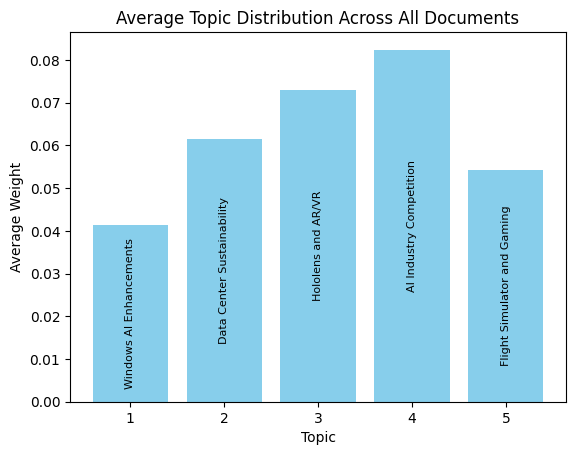

In [18]:
# Visualize average topic distribution across all documents
avg_topic_distribution = W.mean(axis=0)

# Define topic labels
topic_labels = ["Windows AI Enhancements", "Data Center Sustainability",
                "Hololens and AR/VR", "AI Industry Competition",
                "Flight Simulator and Gaming"]

# Create bar plot
bars = plt.bar(np.arange(nmf_model.n_components) + 1, avg_topic_distribution, color='skyblue')

# Add bar labels inside bars
for bar, label in zip(bars, topic_labels):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, label,
             ha='center', va='center', rotation=90, color='black', fontsize=8)

plt.xticks(np.arange(nmf_model.n_components) + 1)
plt.xlabel("Topic")
plt.ylabel("Average Weight")
plt.title("Average Topic Distribution Across All Documents")
plt.show()


This bar plot illustrates the average prevalence of each topic across all documents in the dataset. The height of each bar represents the average weight or importance of that topic across all the documents analyzed. Higher bars indicate topics that are more prominent or discussed more frequently overall.

We can observe that "AI Industry Competition" is the most prevalent topic, followed by "Hololens and AR/VR," based on the heights of their respective bars.

By examining this visualization, we can gain insights into the overall thematic distribution within the dataset. This information will guide further analysis, potentially focusing on documents related to "AI Industry Competition" and "Hololens and AR/VR" for a more in-depth understanding of these dominant themes.

## **5. Conclusion**

In this lesson, we explored different news data sources. We compared and contrasted various sources like yfinance, Google News RSS, and News API. Ultimately, News API was selected for its flexibility and features.

Then, we performed sentiment analysis using FinBERT, a pre-trained NLP model for financial text. Sentiment scores (positive, negative, and neutral) were calculated for news articles about Microsoft. The sentiment scores were plotted over time to observe trends and potential correlations with Microsoft's stock price.

Finally, we applied topic modeling, using NMF (non-negative matrix factorization) to discover underlying topics or themes within the news data. This involved preprocessing the text, creating a document-term matrix with TF-IDF, and applying the NMF algorithm.

---
Copyright 2024 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
